In [1]:
!pip install tqdm


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python3 -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
from tqdm.auto import tqdm

In [3]:
df = pd.read_csv('course_lead_scoring.csv')

In [4]:
df.head()

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NaN,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NaN,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1


In [5]:
df.isnull().sum()

lead_source                 128
industry                    134
number_of_courses_viewed      0
annual_income               181
employment_status           100
location                     63
interaction_count             0
lead_score                    0
converted                     0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   lead_source               1334 non-null   object 
 1   industry                  1328 non-null   object 
 2   number_of_courses_viewed  1462 non-null   int64  
 3   annual_income             1281 non-null   float64
 4   employment_status         1362 non-null   object 
 5   location                  1399 non-null   object 
 6   interaction_count         1462 non-null   int64  
 7   lead_score                1462 non-null   float64
 8   converted                 1462 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 102.9+ KB


In [7]:
num = ['number_of_courses_viewed', 'annual_income', 'interaction_count', 'lead_score']
cat = ['lead_source', 'industry', 'employment_status', 'location']

In [8]:
df[num]=df[num].fillna(0.0)
df[cat] = df[cat].fillna('NA')
df.isna().sum()

lead_source                 0
industry                    0
number_of_courses_viewed    0
annual_income               0
employment_status           0
location                    0
interaction_count           0
lead_score                  0
converted                   0
dtype: int64

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [11]:
df_test = df_test.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_train = df_train.reset_index(drop=True)

In [12]:
y_train = df_train.converted.values
y_test = df_test.converted.values
y_val = df_val.converted.values

In [13]:
del df_train['converted']
del df_val['converted']
del df_test['converted']

## Question 1

In [14]:
for n in num:
    auc = roc_auc_score(y_train, df_train[n])
    print(f"{n}: {auc:.3f}")

number_of_courses_viewed: 0.764
annual_income: 0.552
interaction_count: 0.738
lead_score: 0.614


## Question 2

In [15]:
train_dicts = df_train[cat+num].to_dict(orient = 'records')

In [16]:
dv = DictVectorizer(sparse=False)

In [17]:
X_train = dv.fit_transform(train_dicts)
X_train

array([[9.5543e+04, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        2.0000e+00],
       [5.4924e+04, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        1.0000e+00],
       [7.7352e+04, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        2.0000e+00],
       ...,
       [7.3702e+04, 0.0000e+00, 0.0000e+00, ..., 1.0000e+00, 0.0000e+00,
        1.0000e+00],
       [9.3341e+04, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00]], shape=(876, 31))

In [18]:
val_dicts = df_val[cat+num].to_dict(orient = 'records')

In [19]:
X_val = dv.transform(val_dicts)
X_val

array([[0.0000e+00, 1.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       [5.8777e+04, 1.0000e+00, 0.0000e+00, ..., 1.0000e+00, 0.0000e+00,
        2.0000e+00],
       [7.8148e+04, 0.0000e+00, 1.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        3.0000e+00],
       ...,
       [9.2215e+04, 0.0000e+00, 1.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        4.0000e+00],
       [5.3087e+04, 0.0000e+00, 1.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        2.0000e+00],
       [6.0375e+04, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        3.0000e+00]], shape=(293, 31))

In [20]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)

In [21]:
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


In [22]:
model.coef_.round(2)

array([[-0.  , -0.03,  0.04, -0.01,  0.01, -0.12, -0.02,  0.03, -0.01,
        -0.02, -0.01, -0.03, -0.03, -0.02,  0.33,  0.03,  0.  , -0.  ,
        -0.02, -0.11,  0.07, -0.03,  0.  , -0.01, -0.01, -0.03, -0.01,
        -0.02, -0.02, -0.  ,  0.45]])

In [23]:
model.intercept_[0].round(2)

np.float64(-0.1)

In [24]:
y_pred = model.predict_proba(X_val)[:, 1]

In [25]:
converted_decision = y_pred >= 0.5

In [26]:
base_accuracy = (y_val == converted_decision).mean().round(2)
base_accuracy

np.float64(0.7)

In [27]:
score = roc_auc_score(y_val, y_pred)
print(f'The AUC score rounded to 3 digits is: {score:.2f}')

The AUC score rounded to 3 digits is: 0.82


## Question 3

In [28]:
# creating the confusion table for different thresholds
thresholds = np.arange(0.0, 1.0, 0.01)

scores = []

for t in thresholds: 
    actual_positive = (y_val==1)
    actual_negative = (y_val==0)
    predicted_positive = (y_pred >= t)
    predicted_negative = (y_pred < t)
    true_positive = (predicted_positive & actual_positive).sum()
    true_negative = (predicted_negative & actual_negative).sum()
    false_positive = (predicted_positive & actual_negative).sum()
    false_negative = (predicted_negative & actual_positive).sum()
    scores.append((t, true_positive, true_negative, false_positive, false_negative)) # creating a tupple

In [29]:
# converting the tupple to a dataframe using pandas
col = ('threshold', 'true_positive', 'true_negative', 'false_positive', 'false_negative')
df_scores = pd.DataFrame(scores, columns = col)

In [30]:
df_scores['precision'] = (df_scores.true_positive / (df_scores.true_positive + df_scores.false_positive))
df_scores['recall'] = (df_scores.true_positive / (df_scores.true_positive + df_scores.false_negative))

In [31]:
df_scores

,threshold,true_positive,true_negative,false_positive,false_negative,precision,recall
0,0.00,171,0,122,0,0.583618,1.000000
1,0.01,171,0,122,0,0.583618,1.000000
2,0.02,171,0,122,0,0.583618,1.000000
3,0.03,171,0,122,0,0.583618,1.000000
4,0.04,171,0,122,0,0.583618,1.000000
...,...,...,...,...,...,...,...
95,0.95,5,122,0,166,1.000000,0.029240
96,0.96,3,122,0,168,1.000000,0.017544
97,0.97,1,122,0,170,1.000000,0.005848
98,0.98,0,122,0,171,NaN,0.000000


Text(0.5, 0, 'Threshold')

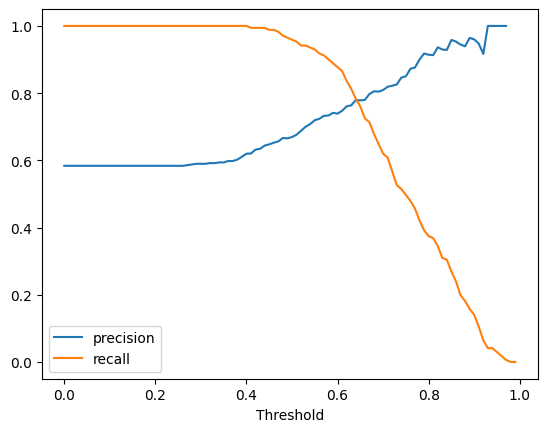

In [32]:
#ploting the precision and recall for each threshold
plt.plot(df_scores.threshold, df_scores['precision'], label = 'precision'),
plt.plot(df_scores.threshold, df_scores['recall'], label = 'recall')
plt.legend()
plt.xlabel('Threshold')

In [33]:
df_scores['diff'] = abs(df_scores['precision'] - df_scores['recall'])
df_scores.loc[df_scores['diff'].idxmin()]

threshold           0.640000
true_positive     134.000000
true_negative      84.000000
false_positive     38.000000
false_negative     37.000000
precision           0.779070
recall              0.783626
diff                0.004556
Name: 64, dtype: float64

In [34]:
df_scores

,threshold,true_positive,true_negative,false_positive,false_negative,precision,recall,diff
0,0.00,171,0,122,0,0.583618,1.000000,0.416382
1,0.01,171,0,122,0,0.583618,1.000000,0.416382
2,0.02,171,0,122,0,0.583618,1.000000,0.416382
3,0.03,171,0,122,0,0.583618,1.000000,0.416382
4,0.04,171,0,122,0,0.583618,1.000000,0.416382
...,...,...,...,...,...,...,...,...
95,0.95,5,122,0,166,1.000000,0.029240,0.970760
96,0.96,3,122,0,168,1.000000,0.017544,0.982456
97,0.97,1,122,0,170,1.000000,0.005848,0.994152
98,0.98,0,122,0,171,NaN,0.000000,NaN


## Question 4

In [35]:
df_scores['F1_score'] = 2 * (df_scores['precision'] * df_scores['recall'] / (df_scores['precision'] + df_scores['recall']))
df_scores.loc[df_scores['F1_score'].idxmax()]

threshold           0.570000
true_positive     156.000000
true_negative      65.000000
false_positive     57.000000
false_negative     15.000000
precision           0.732394
recall              0.912281
diff                0.179886
F1_score            0.812500
Name: 57, dtype: float64

## Question 5

In [47]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[cat+num].to_dict(orient='records')
    dv = DictVectorizer(sparse=False)

    X_train = dv.fit_transform(dicts)
    
    model = LogisticRegression(C=C, max_iter=10000)
    model.fit(X_train, y_train)
    
    return dv, model

In [48]:
def predict(df, dv, model):
    dicts = df[cat+num].to_dict(orient='records')
    
    X = dv.fit_transform(dicts)
    y_pred = model.predict_proba(X)[:,1]
    
    return y_pred

In [49]:
scores = []

kfold = KFold(n_splits = 5, shuffle =True, random_state=1)

for train_idx, val_idx in tqdm(kfold.split(df_full_train)):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]
    
    y_train = df_train.converted.values
    y_val = df_val.converted.values
    
    dv, model = train(df_train, y_train)
    y_pred = predict(df_val, dv, model)
        
    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)

print('%.3f +- %.3f' % (np.mean(scores), np.std(scores)))

0it [00:00, ?it/s]

0.921 +- 0.011


In [51]:

n_splits = 5
for C in tqdm([0.000001, 0.001, 1]):
    scores = []

    kfold = KFold(n_splits = n_splits, shuffle =True, random_state=1)
    
    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]
        
        y_train = df_train.converted.values
        y_val = df_val.converted.values
        
        dv, model = train(df_train, y_train)
        y_pred = predict(df_val, dv, model)
            
        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C=%s %.5f +- %.3f' % (C, np.mean(scores), np.std(scores)))

  0%|          | 0/3 [00:00<?, ?it/s]

C=1e-06 0.92064 +- 0.011
C=0.001 0.92064 +- 0.011
C=1 0.92064 +- 0.011
